# Week 1

- website: https://janboone.github.io/msc_datascience/index.html
- github issues: https://github.com/janboone/msc_datascience/issues
- website screencasts: https://janboone.github.io/msc_datascience/pagescreencasts.html
- first lecture: https://janboone.github.io/msc_datascience/img/Introduction_Lecture.html#introduction
- assignment 1
  - github account
  - jupyterlab: clone repository with notebook
  - final assignment
- suggested workflow:
  - do the datacamp course in the schedule
  - do the relevant parts of the notebook =Statistical Hacking for Economists=
  - post questions that you have on github issues; we will address these in the lectures


## packages we will use

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sn
from scipy import optimize
import pymc3 as pm
import statsmodels.api as sm # check the error that cannot import name 'factorial' in from scipy.misc import factorial
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import tensorflow as tf
import altair as alt
# from linearmodels.iv import IV2SLS
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import arviz as az

import theano
import covid19pandas as cod
from country_codes import eurostat_dictionary
import eurostat
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# For the coming week

In [4]:
tf.random.uniform([10,3], 0,1)

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[0.95244336, 0.32859278, 0.86995184],
       [0.60869646, 0.83111   , 0.3019693 ],
       [0.06256175, 0.46931672, 0.13021433],
       [0.58092785, 0.31890738, 0.84963953],
       [0.46308446, 0.94358945, 0.61900055],
       [0.23513949, 0.08229101, 0.5287658 ],
       [0.32828712, 0.24695933, 0.6400386 ],
       [0.7515856 , 0.93401575, 0.16382408],
       [0.07212424, 0.28586543, 0.41014707],
       [0.00380528, 0.9769503 , 0.52145815]], dtype=float32)>

In [3]:
tf.random.uniform([10,3], 0,1).numpy()

array([[8.1744182e-01, 9.7342157e-01, 4.3929553e-01],
       [8.0849659e-01, 7.5563157e-01, 5.2091098e-01],
       [3.7764049e-01, 5.0584555e-01, 5.1620007e-03],
       [1.9775212e-01, 7.5743258e-01, 2.7220857e-01],
       [8.1690907e-02, 9.2011380e-01, 9.6775746e-01],
       [3.4540236e-01, 8.5186958e-04, 9.0911412e-01],
       [3.4497738e-01, 1.8453002e-02, 8.2404160e-01],
       [5.2766585e-01, 1.0544562e-01, 3.8932300e-01],
       [9.8074937e-01, 2.2512650e-01, 6.8196058e-01],
       [8.3265555e-01, 7.4293518e-01, 4.3911982e-01]], dtype=float32)

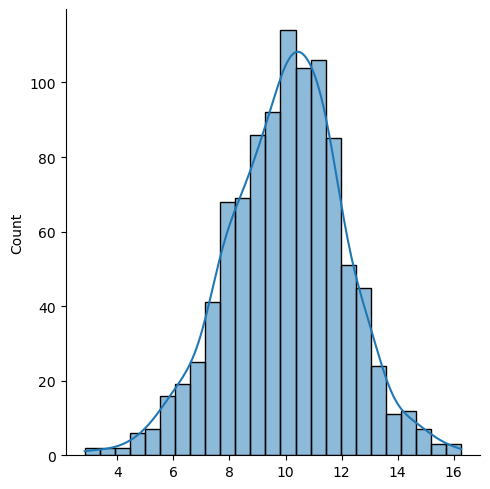

In [6]:
sn.displot(tf.random.normal([1000], 10, 2), kde=True)

In [7]:
pm.Normal.dist(0,1).random(size=(10,3))

array([[-1.04967557, -0.66949741,  0.2950705 ],
       [ 0.87335392,  0.07001381,  1.63977978],
       [ 0.71939026,  0.618822  ,  0.76342442],
       [-0.29752376, -0.9479795 ,  0.9868731 ],
       [-0.54341408,  0.24253115,  1.40796211],
       [-0.16737565,  0.44235434,  0.57439972],
       [-0.85048154, -0.43807653,  1.93525553],
       [ 1.25213911,  1.64456944, -1.29230815],
       [-2.01039387, -0.55785696, -1.44525369],
       [ 0.24373118,  0.6417103 ,  1.33632639]])

In [8]:
np.random.normal(0,1, size = (10,3))

array([[-0.96255673, -0.17546117, -0.827201  ],
       [ 0.70295053,  0.55586988,  1.42632264],
       [ 0.39743879, -0.46482546,  0.72223716],
       [-0.75096011, -0.91417635,  0.59026283],
       [-1.53242292,  0.51154068,  0.55570398],
       [-0.26375822, -0.5535949 , -0.24360691],
       [-0.68535329, -0.83396532,  0.26446561],
       [-0.42983933, -0.06142399,  0.39169004],
       [-0.6786686 ,  2.07869959,  0.01175316],
       [ 0.38108922, -0.20795171,  0.98795705]])

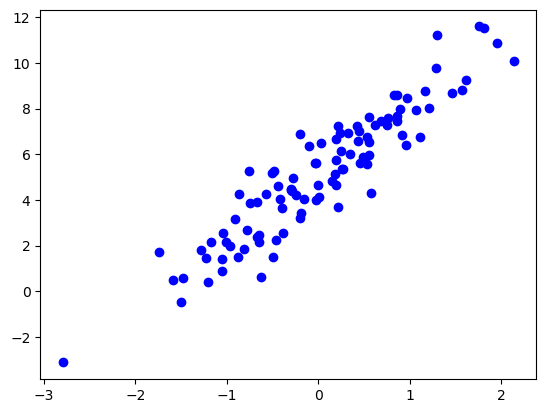

In [10]:
x = np.random.normal(0,1,size = (100,1));
y = 3*x + 5 + np.random.normal(0,1,size=(100,1))

plt.plot(x,y,'bo')

In [13]:
model = sm.OLS(y, sm.add_constant(x))
print("The fitted constant is {:.2f} and the fitted slope equals {:.2f}".format(*model.fit().params))

The fitted constant is 5.07 and the fitted slope equals 2.92


`{:.2f}` stands for a float with two decimals when formatting a string

In [14]:
model.fit().params

array([5.07491857, 2.92350053])

In [15]:
print("a_0 = {}".format(model.fit().params))

a_0 = [5.07491857 2.92350053]


`*` formats/unpacks the list rather than returning it verbatim

In [16]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     635.3
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.28e-44
Time:                        11:52:15   Log-Likelihood:                -145.07
No. Observations:                 100   AIC:                             294.1
Df Residuals:                      98   BIC:                             299.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0749      0.104     48.636      0.000       4.868       5.282
x1             2.9235      0.116     25.205      0.000       2.693       3.154
==============================================================================
Omnibus:                        0.007   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.996   Jarque-Bera (JB):                0.094
Skew:                           0.019   Prob(JB):                        0.954
Kurtosis:                       2.854   Cond. No.                         1.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
def loss(beta):
    y_pred = beta[0] + beta[1]*x;
    return np.sum((y-y_pred)**2);

optimize.minimize(loss, [0,0])

      fun: 106.55032910072059
 hess_inv: array([[ 0.00500701, -0.00020822],
       [-0.00020822,  0.00618688]])
      jac: array([2.86102295e-06, 3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([5.07491858, 2.92350054])

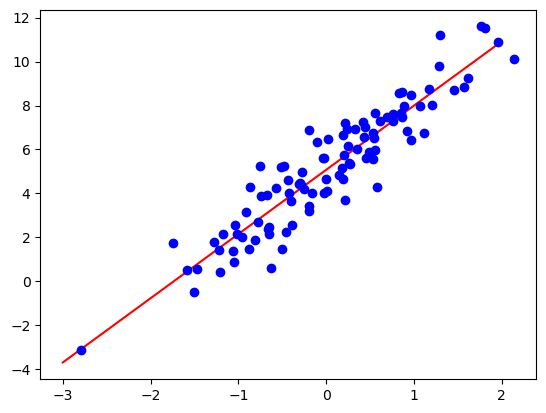

In [22]:
beta = optimize.minimize(loss, [0,0]).x;
range_x = np.arange(-3, 3);
plt.plot(range_x, [beta[0]+beta[1]*x for x in range_x], color="red")

plt.plot(x,y,'bo')

In [20]:
result = optimize.minimize(loss, [0,0]).x;
result # now gives constant and slope
result[0]

5.074918580904756

In [24]:
def loss(beta,x,y):
    y_pred = beta[0] + beta[1]*x;
    return np.sum((y-y_pred)**2);

slopes = [];

for i in range(100):
    x = np.random.normal(0,1,size = (100,1));
    y = 3*x + 5 + np.random.normal(0,1,size=(100,1));
    beta = optimize.minimize(lambda beta: loss(beta,x,y), [0,0]).x;
    slopes.append(beta[1]);

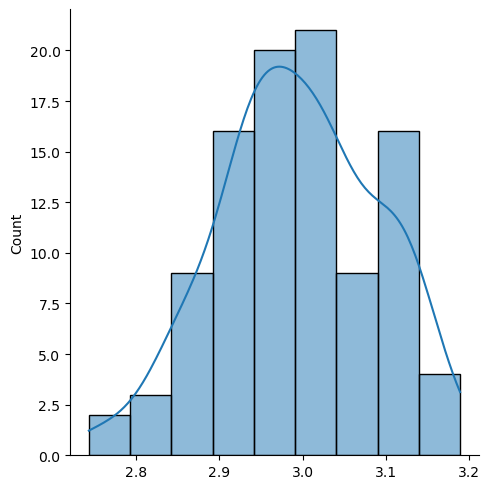

In [25]:
sn.displot(slopes, kde=True)

In [30]:
np.sum(np.array(slopes)>3)/len(slopes)

0.47

In [32]:
len(slopes)

100